In [23]:
import numpy as np
import scipy as spy
import  scipy.integrate
import loadData as ld
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline
axl_font_sz = 16;
fwidth = 4.0; fheight = fwidth/1.2;
nframe = 1;

[ 0.49    0.49    0.735   0.931   1.47    2.989   3.1605  3.038   2.842
  2.5235  2.254   2.0825]
Row leaf area index 4.03


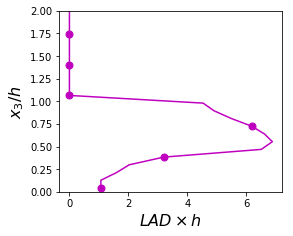

In [37]:
#load LAD profile
master_dir_90 = "/home/ahsan/LAI_4_16_rows_45/"
inpara_90 = ld.readInput(master_dir_90+"/input/LESinputs.txt");
fname = master_dir_90+"/input/PlantDensity.ini";
lad3d_90 = ld.loadField(fname, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz']);
z_u = np.linspace(0.5*inpara_90['dz'], inpara_90['l_z']+0.5*inpara_90['dz'], inpara_90['Nz']);
z_w = np.linspace(0.0*inpara_90['dz'], inpara_90['l_z'], inpara_90['Nz']);

non_zero_pos = np.nonzero(lad3d_90[:,10,10]);
lad_true_indx = non_zero_pos[0][3]; 
vert_last_lad_indx = len(np.nonzero(lad3d_90[lad_true_indx ,10,:])[0]);
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot(lad3d_90[lad_true_indx,10,:]*inpara_90['h_canopy'],z_u/inpara_90['h_canopy'],  '-om',markevery=4, MarkerSize=7);
ax.set_ylim([0, 2]);
ax.set_xlabel(r'$LAD \times h$', fontsize= axl_font_sz);
ax.set_ylabel(r'$x_3/h$', fontsize= axl_font_sz);
plt.box(on=1);
print(lad3d_90[lad_true_indx,24,0:vert_last_lad_indx])
LAI = scipy.integrate.trapz(lad3d_90[lad_true_indx,24,0:vert_last_lad_indx], z_w[0:vert_last_lad_indx]);
print("Row leaf area index {0:2.2f}".format(LAI));

``Row Leaf Area Index = 1.01``

`Siumlation parameteres`

| simulation | N_1, N_2, N_3 | Canopy Height,h(m)| L_1/h, L_2/h, L_3/h |Mean angle of forcing(wrt. vine row, ccw)|
| :---------:|:-------------:|:-----------------:|:-------------------:|:---------------------------------------:|
| M90        | 96,96,96      |       2.18        |  11.09, 11.09, 8    |           90                            |

1,2,3 corresponds to perpendicular to vine row, vine row and vertical directions, respectively

``Row width = 0.5 m``

``Row Spaing = 1.5 m``

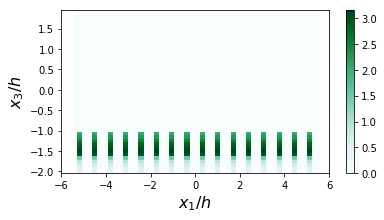

In [38]:
x = np.arange(inpara_90['Nx']);
y = np.arange(inpara_90['Nz']);
x = x - x[47];
y = y - y[24];
x = [i*inpara_90['dx']/inpara_90['h_canopy'] for i in x];
y = [i*inpara_90['dz']/inpara_90['h_canopy'] for i in y] ;

fig = plt.figure();
fig.set_size_inches(6, 3);
ax = fig.add_subplot(111);
ss = inpara_90['h_canopy'];
pevery = 1;
colors = np.sqrt((np.mean(lad3d_90, axis=1)).T[::pevery,::pevery]**2/ss, \
                np.mean(lad3d_90, axis=1).T[::pevery,::pevery]**2/ss)/np.sqrt(2);
ladprof = np.mean(lad3d_90, axis=1).T[::pevery,::pevery];

xx, yy = np.meshgrid(x[::pevery], y[::pevery]);
xx = np.reshape(xx, xx.size, order='c');
yy = np.reshape(yy, xx.size, order='c');
ladprof = np.reshape(ladprof/np.max(ladprof), ladprof.size, order='c');
#ax.scatter(xx,yy, c=ladprof, cmap=cm.BuGn, marker=r'o', alpha=0.75);
XX, YY = np.meshgrid(x[::pevery], y[::pevery]);
pax = ax.pcolormesh(XX.T, YY.T, lad3d_90[:, 48,:], cmap=cm.BuGn);
fig.colorbar(pax);
ax.set_xlim([-6, 6]);
ax.set_xlabel(r'$x_1/h$', fontsize= axl_font_sz);
ax.set_ylabel(r'$x_3/h$', fontsize= axl_font_sz);

``Leaf Area Density Map on x_1, x_3 plane``